In [322]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

## Predicting Life Expectancy at Birth using Global Demographic Data


Problem:
- Life expectancy at birth is a major indicator of a country’s overall health
- It is important for someone to understand their life expectancy (financial planning, healthcare planning, etc)
- We want to see if we can accurately predict average life expectancy at birth using demographic data from countries all over the world
- Will also help us determine which factors play the largest role in predicting life expectancy

Question: Can we accurately predict someone’s life expectancy given specific demographic factors?

Which ML model is the best to predict average life expectancy?
- Decision trees?
- Clustering?
- Random forests?
- kNN?

Addition question we need to explore... should we build different models for males and females?



In [409]:
#importing data
data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)
data


/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/478161895.py:2: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [410]:
#dropping columns
columns_to_drop = ['Index', 'Variant', 'Notes', 'Location code', 'ISO2 Alpha-code', 
                   'SDMX code**', 'Parent code', 'Total Population, as of 1 January (thousands)', 
                   'Population Annual Doubling Time (years)', 'Population Change (thousands)', 'Population Change (thousands)', 'Male Population, as of 1 July (thousands)',
                   'Births (thousands)', 'Births by women aged 15 to 19 (thousands)', 'Female Population, as of 1 July (thousands)', 'Total Deaths (thousands)', 'Male Deaths (thousands)',
                   'Female Deaths (thousands)', 'Male Life Expectancy at Birth (years)', 'Female Life Expectancy at Birth (years)', 'Male Life Expectancy at Age 15 (years)', 'Female Life Expectancy at Age 15 (years)',
                   'Male Life Expectancy at Age 65 (years)', 'Female Life Expectancy at Age 65 (years)', 'Male Life Expectancy at Age 80 (years)', 'Female Life Expectancy at Age 80 (years)', 'Infant Deaths, under age 1 (thousands)',
                   'Live Births Surviving to Age 1 (thousands)', 'Under-Five Deaths, under age 5 (thousands)', 'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)', 'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
                   'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)', 'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)', 'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
                   'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)', 'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)', 'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
                   'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)', 'Net Number of Migrants (thousands)',
                   'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)','Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)', 'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)', 
                    'Life Expectancy at Age 15, both sexes (years)', 'Life Expectancy at Age 65, both sexes (years)', 'Life Expectancy at Age 80, both sexes (years)',
                    'Crude Death Rate (deaths per 1,000 population)', 'Infant Mortality Rate (infant deaths per 1,000 live births)','Under-Five Mortality (deaths under age 5 per 1,000 live births)','Median Age, as of 1 July (years)','Sex Ratio at Birth (males per 100 female births)']

data = data.drop(columns_to_drop, axis=1)

In [279]:
#data               

In [411]:
#choosing only rows with columns
just_countries = data[data['Type'] == 'Country/Area']
just_countries = just_countries.drop(['Region, subregion, country or area *'], axis=1)



In [412]:
#only years  2000-2021
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
just_countries_years = just_countries[just_countries['Year'].isin(years)]
just_countries_years

,ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,243.1,97.0,168,26.6,2.03,42.5,6.87,2.42,31.1,47.5,-6.3
1783,BDI,Country/Area,2001.0,6 466,249.2,97.0,178,27.6,2.91,42.9,6.85,2.44,31.0,48.4,1.5
1784,BDI,Country/Area,2002.0,6 649,256.2,97.1,195,29.3,2.68,43.8,6.82,2.48,31.0,49.9,-2.5
1785,BDI,Country/Area,2003.0,6 861,264.4,97.1,209,30.5,3.58,44.5,6.79,2.50,30.9,50.9,5.4
1786,BDI,Country/Area,2004.0,7 120,274.4,97.2,227,31.9,3.85,45.3,6.75,2.52,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,85.3,93.6,0,6.0,-1.11,12.7,2.03,0.96,30.0,77.5,-16.7
20592,WLF,Country/Area,2018.0,12,84.4,93.3,0,5.6,-0.92,12.4,2.01,0.96,30.0,77.9,-14.4
20593,WLF,Country/Area,2019.0,12,83.7,93.1,0,6.1,-0.8,12.2,1.99,0.95,30.0,79.6,-14.5
20594,WLF,Country/Area,2020.0,12,83.2,93.0,0,5.2,-0.22,12.0,1.98,0.94,30.0,78.8,-7.1


In [413]:
#just renaming a few for now - we should go back and rename more!
just_countries_years = just_countries_years.rename(columns={'Total Population, as of 1 July (thousands)': 'Total Pop', 'Male Population, as of 1 July (thousands)': 'Male Pop', 
                                                            'Female Population, as of 1 July (thousands)': 'Female Pop', 'Population Density, as of 1 July (persons per square km)': 'Population Density'})
just_countries_years


,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,243.1,97.0,168,26.6,2.03,42.5,6.87,2.42,31.1,47.5,-6.3
1783,BDI,Country/Area,2001.0,6 466,249.2,97.0,178,27.6,2.91,42.9,6.85,2.44,31.0,48.4,1.5
1784,BDI,Country/Area,2002.0,6 649,256.2,97.1,195,29.3,2.68,43.8,6.82,2.48,31.0,49.9,-2.5
1785,BDI,Country/Area,2003.0,6 861,264.4,97.1,209,30.5,3.58,44.5,6.79,2.50,30.9,50.9,5.4
1786,BDI,Country/Area,2004.0,7 120,274.4,97.2,227,31.9,3.85,45.3,6.75,2.52,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,85.3,93.6,0,6.0,-1.11,12.7,2.03,0.96,30.0,77.5,-16.7
20592,WLF,Country/Area,2018.0,12,84.4,93.3,0,5.6,-0.92,12.4,2.01,0.96,30.0,77.9,-14.4
20593,WLF,Country/Area,2019.0,12,83.7,93.1,0,6.1,-0.8,12.2,1.99,0.95,30.0,79.6,-14.5
20594,WLF,Country/Area,2020.0,12,83.2,93.0,0,5.2,-0.22,12.0,1.98,0.94,30.0,78.8,-7.1


In [414]:
#random "..." throughout --> replacing them with NAs to then drop
just_countries_years.replace('...', np.nan, inplace=True)


/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


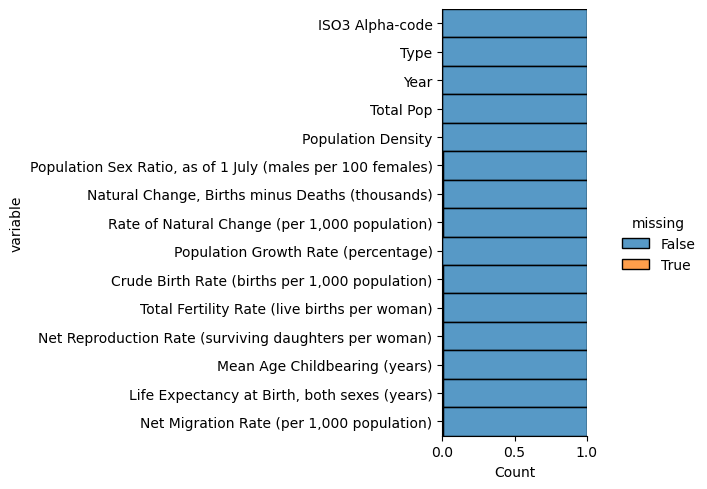

In [415]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#no missing values!!!

In [416]:
#drop the one column with a bunch of NAs and then delete the rest of the NAs
just_countries_years = just_countries_years.dropna()

/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


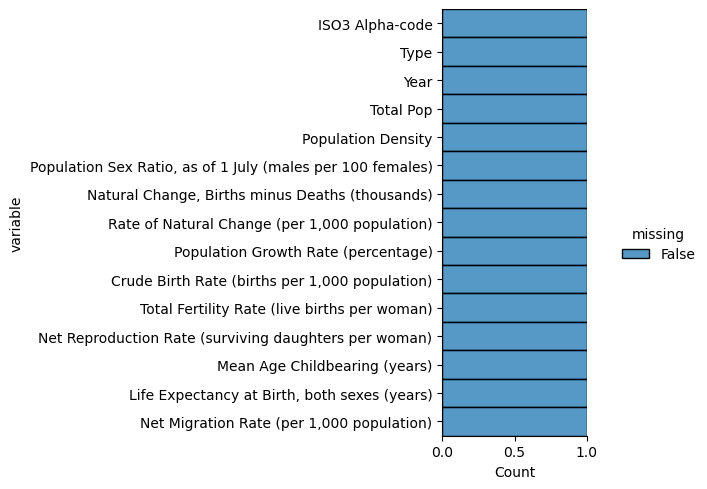

In [417]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [420]:
just_countries_years.info()

,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,243.1,97.0,168,26.6,2.03,42.5,6.87,2.42,31.1,47.5,-6.3
1783,BDI,Country/Area,2001.0,6 466,249.2,97.0,178,27.6,2.91,42.9,6.85,2.44,31.0,48.4,1.5
1784,BDI,Country/Area,2002.0,6 649,256.2,97.1,195,29.3,2.68,43.8,6.82,2.48,31.0,49.9,-2.5
1785,BDI,Country/Area,2003.0,6 861,264.4,97.1,209,30.5,3.58,44.5,6.79,2.50,30.9,50.9,5.4
1786,BDI,Country/Area,2004.0,7 120,274.4,97.2,227,31.9,3.85,45.3,6.75,2.52,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,85.3,93.6,0,6.0,-1.11,12.7,2.03,0.96,30.0,77.5,-16.7
20592,WLF,Country/Area,2018.0,12,84.4,93.3,0,5.6,-0.92,12.4,2.01,0.96,30.0,77.9,-14.4
20593,WLF,Country/Area,2019.0,12,83.7,93.1,0,6.1,-0.8,12.2,1.99,0.95,30.0,79.6,-14.5
20594,WLF,Country/Area,2020.0,12,83.2,93.0,0,5.2,-0.22,12.0,1.98,0.94,30.0,78.8,-7.1


In [421]:
data2 = just_countries_years 

In [154]:
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.to_numeric(just_countries_years['Life Expectancy at Birth, both sexes (years)'], errors='coerce')


In [155]:
#target variable: Life Expectancy at Birth, both sexes (years)
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].astype(float)
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].describe()



In [156]:
#x = just_countries_years['Life Expectancy at Birth, both sexes (years)']
#bins = [0,69.3,76,100]
#labels=['low','middle','high']
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.cut(x, bins, labels) 

In [157]:
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
#low = 42-69.3
#middle = 69.3-76
#high = 76-86.5


In [158]:
#new_labels = ['Small', 'Moderate', 'Large']  # Define new labels for the bins here
#new_labels = ['low','middle','high']
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].cat.rename_categories(new_labels)

In [159]:
# Plotting using Seaborn for a categorical bar plot
#plt.figure(figsize=(10, 6))
#sns.countplot(x='Life Expectancy at Birth, both sexes (years)', hue='Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)', data=just_countries_years, palette='viridis')

In [160]:
#convert births into a numeric

#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].replace(" ","")
#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].replace("  ","")
#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].astype(float)


In [423]:
# Function to remove spaces and convert to float
#CONVERTING OBJECTS TO FLOATS!!! 
import re

def remove_spaces_and_convert_to_float(value):
    if isinstance(value, str):
        try:
            value_without_space = re.sub(r'\s+', '', value)
            return float(value_without_space)
        except ValueError:
            print(f"Could not convert to float: {value}")
            return None  # or any other handling for invalid values
    else:
        return value

# Apply the function to the column
just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Density'] = just_countries_years['Population Density'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'] = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Natural Change, Births minus Deaths (thousands)'] = just_countries_years['Natural Change, Births minus Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Rate of Natural Change (per 1,000 population)'] = just_countries_years['Rate of Natural Change (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Growth Rate (percentage)'] = just_countries_years['Population Growth Rate (percentage)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Crude Birth Rate (births per 1,000 population)'] = just_countries_years['Crude Birth Rate (births per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Total Fertility Rate (live births per woman)'] = just_countries_years['Total Fertility Rate (live births per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Net Reproduction Rate (surviving daughters per woman)'] = just_countries_years['Net Reproduction Rate (surviving daughters per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mean Age Childbearing (years)'] = just_countries_years['Mean Age Childbearing (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Sex Ratio at Birth (males per 100 female births)'] = just_countries_years['Sex Ratio at Birth (males per 100 female births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Crude Death Rate (deaths per 1,000 population)'] = just_countries_years['Crude Death Rate (deaths per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 15, both sexes (years)'] = just_countries_years['Life Expectancy at Age 15, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 65, both sexes (years)'] = just_countries_years['Life Expectancy at Age 65, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 80, both sexes (years)'] = just_countries_years['Life Expectancy at Age 80, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'] = just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'] = just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'] = just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'] = just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Net Migration Rate (per 1,000 population)'] = just_countries_years['Net Migration Rate (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

just_countries_years.info()

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/2528428282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))
/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/2528428282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Population Density'] = just_countries_years['Population Density'].apply(lambda x: remove_spaces_and_convert

,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6308.0,243.1,97.0,168.0,26.6,2.03,42.5,6.87,2.42,31.1,47.5,-6.3
1783,BDI,Country/Area,2001.0,6466.0,249.2,97.0,178.0,27.6,2.91,42.9,6.85,2.44,31.0,48.4,1.5
1784,BDI,Country/Area,2002.0,6649.0,256.2,97.1,195.0,29.3,2.68,43.8,6.82,2.48,31.0,49.9,-2.5
1785,BDI,Country/Area,2003.0,6861.0,264.4,97.1,209.0,30.5,3.58,44.5,6.79,2.50,30.9,50.9,5.4
1786,BDI,Country/Area,2004.0,7120.0,274.4,97.2,227.0,31.9,3.85,45.3,6.75,2.52,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12.0,85.3,93.6,0.0,6.0,-1.11,12.7,2.03,0.96,30.0,77.5,-16.7
20592,WLF,Country/Area,2018.0,12.0,84.4,93.3,0.0,5.6,-0.92,12.4,2.01,0.96,30.0,77.9,-14.4
20593,WLF,Country/Area,2019.0,12.0,83.7,93.1,0.0,6.1,-0.80,12.2,1.99,0.95,30.0,79.6,-14.5
20594,WLF,Country/Area,2020.0,12.0,83.2,93.0,0.0,5.2,-0.22,12.0,1.98,0.94,30.0,78.8,-7.1


Crude Birth Rate

(array([0.002185  , 0.0133528 , 0.0555962 , 0.073319  , 0.0577812 ,
        0.04382146, 0.03204672, 0.03471728, 0.03350339, 0.02379226,
        0.03605256, 0.02537032, 0.01480947, 0.01408113, 0.01796558,
        0.01845114, 0.01359558, 0.01735864, 0.01529502, 0.01323141,
        0.01638753, 0.01286724, 0.00946835, 0.01092502, 0.00910418,
        0.00473417, 0.00521973, 0.00254917, 0.00194223, 0.00072833]),
 array([ 5.1       ,  6.68666667,  8.27333333,  9.86      , 11.44666667,
        13.03333333, 14.62      , 16.20666667, 17.79333333, 19.38      ,
        20.96666667, 22.55333333, 24.14      , 25.72666667, 27.31333333,
        28.9       , 30.48666667, 32.07333333, 33.66      , 35.24666667,
        36.83333333, 38.42      , 40.00666667, 41.59333333, 43.18      ,
        44.76666667, 46.35333333, 47.94      , 49.52666667, 51.11333333,
        52.7       ]),
 <BarContainer object of 30 artists>)

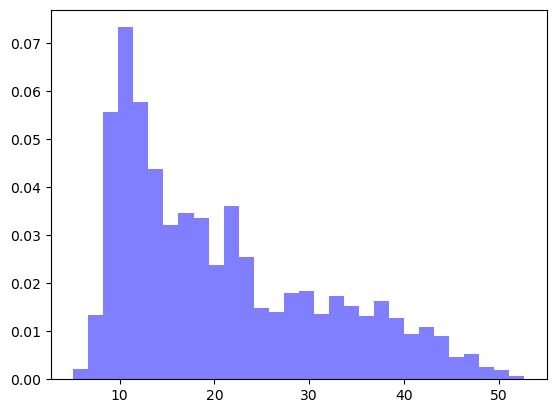

In [455]:
column_data_birthrate = just_countries_years['Crude Birth Rate (births per 1,000 population)']
plt.hist(column_data_birthrate, bins=30, density=True, alpha=0.5, color='blue')

Rate of Natural Change

(array([0.00033335, 0.00055559, 0.00055559, 0.00211124, 0.00600036,
        0.01244518, 0.01644542, 0.01911224, 0.03978014, 0.04122467,
        0.03989125, 0.03344643, 0.02589042, 0.02633489, 0.02777942,
        0.03411313, 0.02911284, 0.03000178, 0.02377919, 0.01966783,
        0.01588983, 0.01711213, 0.02233466, 0.02489036, 0.02600154,
        0.01455642, 0.01266742, 0.01011171, 0.00222235, 0.00255571]),
 array([-1.39000000e+01, -1.21666667e+01, -1.04333333e+01, -8.70000000e+00,
        -6.96666667e+00, -5.23333333e+00, -3.50000000e+00, -1.76666667e+00,
        -3.33333333e-02,  1.70000000e+00,  3.43333333e+00,  5.16666667e+00,
         6.90000000e+00,  8.63333333e+00,  1.03666667e+01,  1.21000000e+01,
         1.38333333e+01,  1.55666667e+01,  1.73000000e+01,  1.90333333e+01,
         2.07666667e+01,  2.25000000e+01,  2.42333333e+01,  2.59666667e+01,
         2.77000000e+01,  2.94333333e+01,  3.11666667e+01,  3.29000000e+01,
         3.46333333e+01,  3.63666667e+01,  3.81000000e+01]

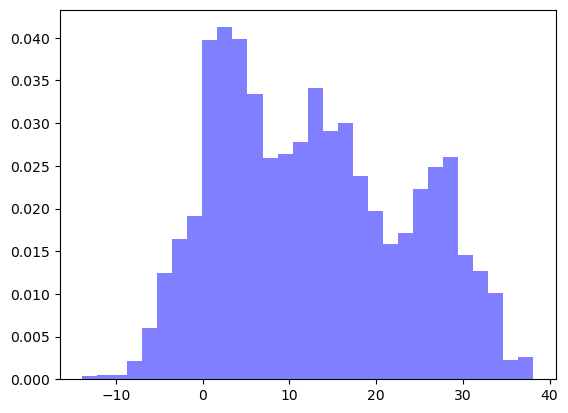

In [454]:
column_data_natural = just_countries_years['Rate of Natural Change (per 1,000 population)']
plt.hist(column_data_natural, bins=30, density=True, alpha=0.5, color='blue')

Net Migration Rate

(array([1.46988557e-05, 0.00000000e+00, 0.00000000e+00, 1.46988557e-05,
        1.46988557e-05, 1.46988557e-05, 0.00000000e+00, 7.34942786e-05,
        2.05783980e-04, 2.79278259e-04, 1.29349930e-03, 3.86579906e-03,
        3.92900413e-02, 2.58258895e-02, 3.45423110e-03, 1.19060731e-03,
        2.35181692e-04, 1.46988557e-04, 1.17590846e-04, 8.81931343e-05,
        4.40965672e-05, 1.46988557e-05, 0.00000000e+00, 4.40965672e-05,
        1.46988557e-05, 1.46988557e-05, 2.93977114e-05, 1.46988557e-05,
        0.00000000e+00, 1.46988557e-05]),
 array([-1.70200000e+02, -1.57096667e+02, -1.43993333e+02, -1.30890000e+02,
        -1.17786667e+02, -1.04683333e+02, -9.15800000e+01, -7.84766667e+01,
        -6.53733333e+01, -5.22700000e+01, -3.91666667e+01, -2.60633333e+01,
        -1.29600000e+01,  1.43333333e-01,  1.32466667e+01,  2.63500000e+01,
         3.94533333e+01,  5.25566667e+01,  6.56600000e+01,  7.87633333e+01,
         9.18666667e+01,  1.04970000e+02,  1.18073333e+02,  1.31176667e+02

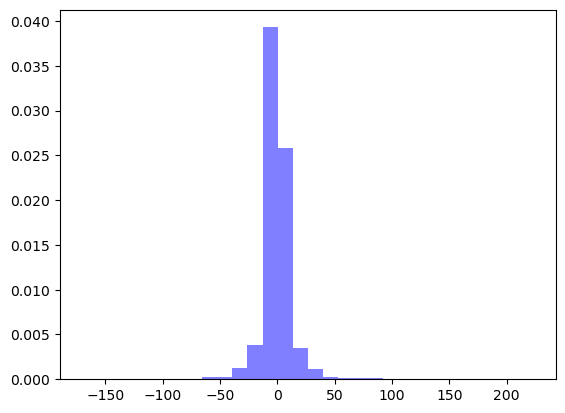

In [457]:
column_data_migration = just_countries_years["Net Migration Rate (per 1,000 population)"]
plt.hist(column_data_migration, bins=30, density=True, alpha=0.5, color='blue')

Net Reproduction Rate

(array([0.03910006, 0.12816131, 0.47788964, 1.07090724, 1.15345181,
        1.08394059, 0.89278474, 0.74941784, 0.62125653, 0.67990662,
        0.58650092, 0.41706732, 0.30193936, 0.25849485, 0.22156701,
        0.23242814, 0.2628393 , 0.27804488, 0.27370043, 0.38013949,
        0.39100061, 0.21722256, 0.12598909, 0.11078351, 0.13033354,
        0.09775015, 0.04344451, 0.0086889 , 0.01303335, 0.03041116]),
 array([0.36      , 0.44866667, 0.53733333, 0.626     , 0.71466667,
        0.80333333, 0.892     , 0.98066667, 1.06933333, 1.158     ,
        1.24666667, 1.33533333, 1.424     , 1.51266667, 1.60133333,
        1.69      , 1.77866667, 1.86733333, 1.956     , 2.04466667,
        2.13333333, 2.222     , 2.31066667, 2.39933333, 2.488     ,
        2.57666667, 2.66533333, 2.754     , 2.84266667, 2.93133333,
        3.02      ]),
 <BarContainer object of 30 artists>)

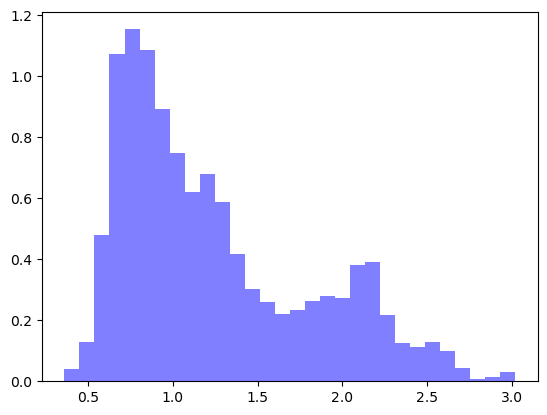

In [458]:
column_data_reproduction = just_countries_years['Net Reproduction Rate (surviving daughters per woman)']
plt.hist(column_data_reproduction, bins=30, density=True, alpha=0.5, color='blue')

Population Density

(array([1.14125271e-03, 3.62302447e-05, 2.78694190e-06, 5.10939348e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.64490316e-06,
        2.78694190e-06, 1.39347095e-06, 1.39347095e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.96735474e-07, 4.64490316e-07, 4.64490316e-07, 4.64490316e-07,
        4.64490316e-07, 4.64490316e-07, 4.64490316e-07, 4.64490316e-07,
        4.64490316e-07, 1.39347095e-06, 1.85796126e-06, 2.32245158e-07,
        4.64490316e-07, 1.85796126e-06]),
 array([1.00000000e-01, 8.29413333e+02, 1.65872667e+03, 2.48804000e+03,
        3.31735333e+03, 4.14666667e+03, 4.97598000e+03, 5.80529333e+03,
        6.63460667e+03, 7.46392000e+03, 8.29323333e+03, 9.12254667e+03,
        9.95186000e+03, 1.07811733e+04, 1.16104867e+04, 1.24398000e+04,
        1.32691133e+04, 1.40984267e+04, 1.49277400e+04, 1.57570533e+04,
        1.65863667e+04, 1.74156800e+04, 1.82449933e+04, 1.90743067e+04,
        1.99036200e+04

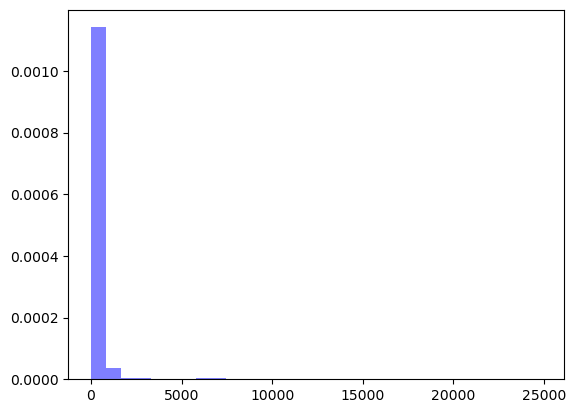

In [459]:
column_data_popdensity = just_countries_years['Population Density']
plt.hist(column_data_popdensity, bins=30, density=True, alpha=0.5, color='blue')

Population Growth Rate

(array([1.44996742e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.89993485e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.44996742e-04, 5.79986970e-04, 1.59496417e-03, 4.20490553e-03,
        1.53696547e-02, 1.08312567e-01, 2.85063596e-01, 2.21700019e-01,
        9.17829379e-02, 1.53696547e-02, 2.89993485e-03, 1.73996091e-03,
        1.01497720e-03, 5.79986970e-04, 5.79986970e-04, 1.44996742e-04,
        5.79986970e-04, 0.00000000e+00, 2.89993485e-04, 1.44996742e-04,
        1.44996742e-04, 1.44996742e-04]),
 array([-1.85900000e+01, -1.72616667e+01, -1.59333333e+01, -1.46050000e+01,
        -1.32766667e+01, -1.19483333e+01, -1.06200000e+01, -9.29166667e+00,
        -7.96333333e+00, -6.63500000e+00, -5.30666667e+00, -3.97833333e+00,
        -2.65000000e+00, -1.32166667e+00,  6.66666667e-03,  1.33500000e+00,
         2.66333333e+00,  3.99166667e+00,  5.32000000e+00,  6.64833333e+00,
         7.97666667e+00,  9.30500000e+00,  1.06333333e+01,  1.19616667e+01

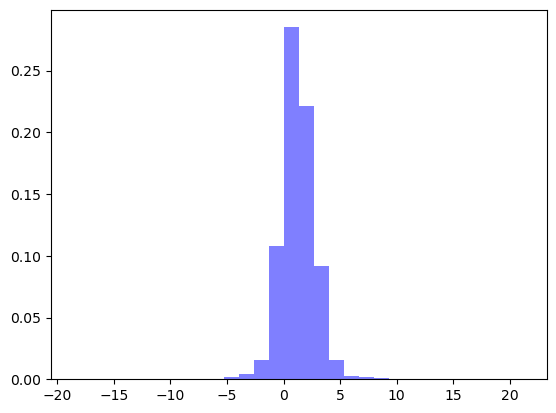

In [460]:
column_data_popgrowth = just_countries_years['Population Growth Rate (percentage)']
plt.hist(column_data_popgrowth, bins=30, density=True, alpha=0.5, color='blue')

Sex Ratio (males per 100 females)

(array([7.26970333e-03, 4.69119367e-02, 5.58755515e-02, 7.85786703e-03,
        7.29322988e-04, 2.11738932e-04, 1.12927430e-03, 2.82318576e-04,
        1.17632740e-04, 2.82318576e-04, 2.58792028e-04, 4.70530960e-05,
        1.41159288e-04, 0.00000000e+00, 2.35265480e-05, 9.41061919e-05,
        1.41159288e-04, 4.70530960e-05, 9.41061919e-05, 4.70530960e-05,
        1.17632740e-04, 4.70530960e-05, 1.17632740e-04, 2.35265480e-05,
        2.35265480e-05, 7.05796440e-05, 7.05796440e-05, 4.70530960e-05,
        2.35265480e-05, 4.70530960e-05]),
 array([ 81.9       ,  90.08666667,  98.27333333, 106.46      ,
        114.64666667, 122.83333333, 131.02      , 139.20666667,
        147.39333333, 155.58      , 163.76666667, 171.95333333,
        180.14      , 188.32666667, 196.51333333, 204.7       ,
        212.88666667, 221.07333333, 229.26      , 237.44666667,
        245.63333333, 253.82      , 262.00666667, 270.19333333,
        278.38      , 286.56666667, 294.75333333, 302.94      ,
      

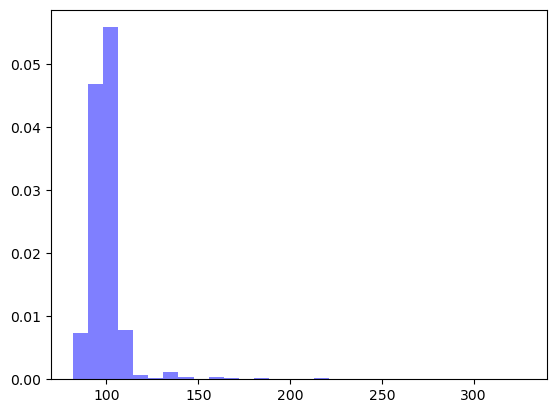

In [461]:
column_data_sexratio = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)']
plt.hist(column_data_sexratio, bins=30, density=True, alpha=0.5, color='blue')

Total Fertility Rate

(array([0.02400652, 0.09685388, 0.40562735, 0.5687061 , 0.46522973,
        0.39486581, 0.30960128, 0.30297879, 0.21771427, 0.18625746,
        0.11837696, 0.1134101 , 0.11754915, 0.10430418, 0.09437044,
        0.10099293, 0.08857577, 0.09188701, 0.09354263, 0.07119174,
        0.06705268, 0.0678805 , 0.04884084, 0.02814557, 0.02980119,
        0.03145681, 0.01738403, 0.01572841, 0.01158935, 0.01407279]),
 array([0.75      , 0.98266667, 1.21533333, 1.448     , 1.68066667,
        1.91333333, 2.146     , 2.37866667, 2.61133333, 2.844     ,
        3.07666667, 3.30933333, 3.542     , 3.77466667, 4.00733333,
        4.24      , 4.47266667, 4.70533333, 4.938     , 5.17066667,
        5.40333333, 5.636     , 5.86866667, 6.10133333, 6.334     ,
        6.56666667, 6.79933333, 7.032     , 7.26466667, 7.49733333,
        7.73      ]),
 <BarContainer object of 30 artists>)

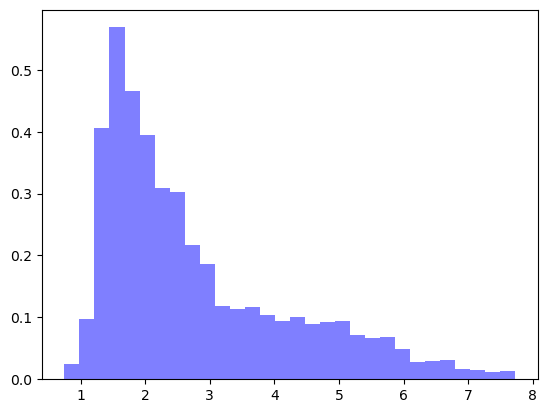

In [462]:
column_data_fertility = just_countries_years['Total Fertility Rate (live births per woman)']
plt.hist(column_data_fertility, bins=30, density=True, alpha=0.5, color='blue')

Total Population

(array([1.86567183e-05, 1.27241736e-06, 3.56601044e-07, 2.63398499e-07,
        1.66143668e-07, 6.07842689e-08, 7.29411227e-08, 1.21568538e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.10456919e-09, 1.21568538e-08,
        8.10456919e-09, 1.21568538e-08, 2.43137076e-08, 3.64705613e-08,
        3.24182768e-08, 4.45751305e-08]),
 array([1.00000000e+00, 4.75307333e+04, 9.50604667e+04, 1.42590200e+05,
        1.90119933e+05, 2.37649667e+05, 2.85179400e+05, 3.32709133e+05,
        3.80238867e+05, 4.27768600e+05, 4.75298333e+05, 5.22828067e+05,
        5.70357800e+05, 6.17887533e+05, 6.65417267e+05, 7.12947000e+05,
        7.60476733e+05, 8.08006467e+05, 8.55536200e+05, 9.03065933e+05,
        9.50595667e+05, 9.98125400e+05, 1.04565513e+06, 1.09318487e+06,
        1.14071460e+06

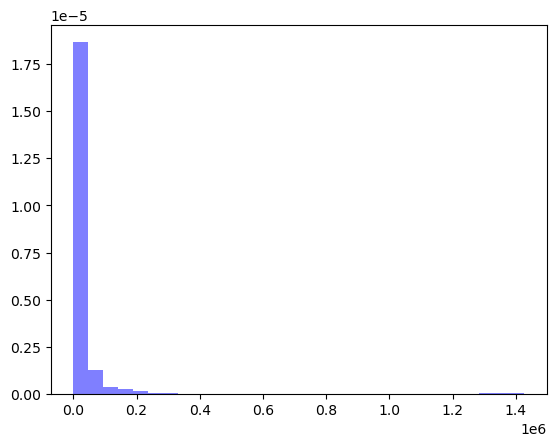

In [463]:
column_data_pop = just_countries_years['Total Pop']
plt.hist(column_data_pop, bins=30, density=True, alpha=0.5, color='blue')

In [256]:
# Sample data
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Births (thousands)'] # Values for each category

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')

# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Births (thousands) (mean)')
plt.title('Life Expectancy vs. Births')

# Show the plot
plt.show()

KeyError: 'Births (thousands)'

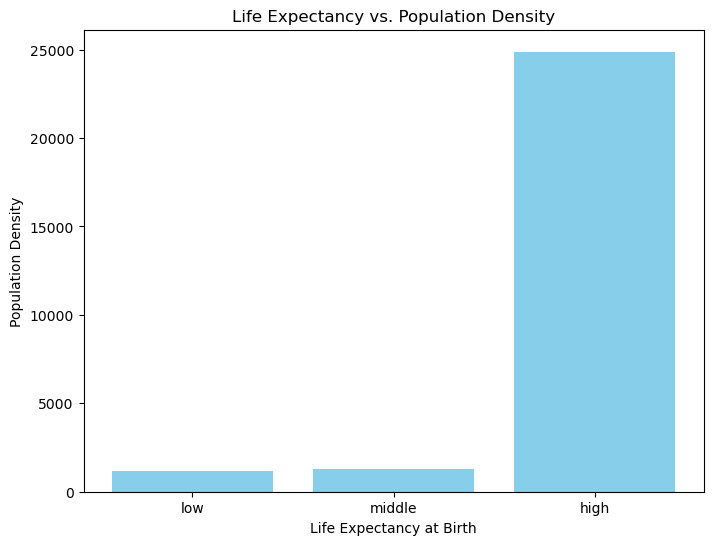

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Population Density'] # Values for each category

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')

# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Population Density')
plt.title('Life Expectancy vs. Population Density')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Population Density'] = just_countries_years['Population Density'].astype(float)


In [ ]:
# Function to remove spaces and convert to float
def remove_spaces_and_convert_to_float(value):
    if isinstance(value, str):
        value_without_space = re.sub(r'\s+', '', value)
        return float(value_without_space)
    else:
        return value

# Apply the function to the column
just_countries_years['Male Pop'] = just_countries_years['Male Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))

In [ ]:
just_countries_years['Male Pop'] = just_countries_years['Male Pop'].astype(float)

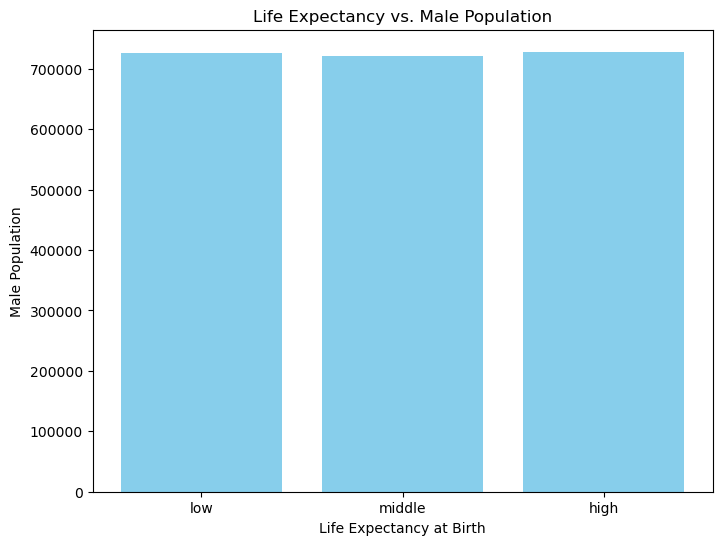

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Male Pop'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Male Population')
plt.title('Life Expectancy vs. Male Population')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/2707886933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))


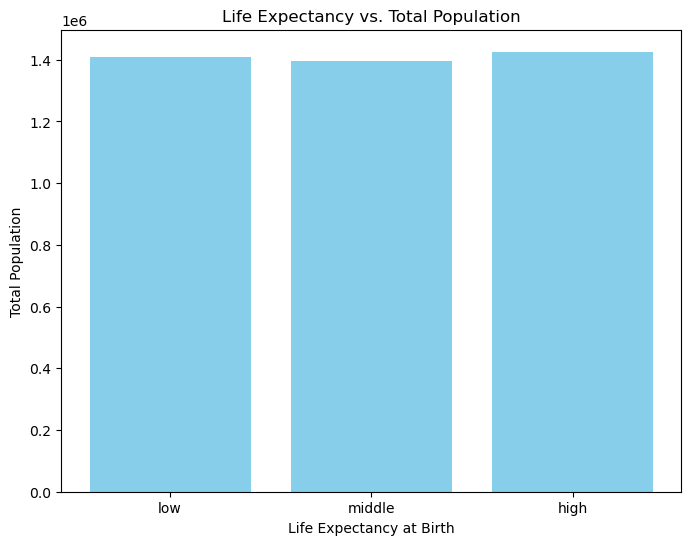

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Total Pop'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Total Population')
plt.title('Life Expectancy vs. Total Population')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/4187479566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


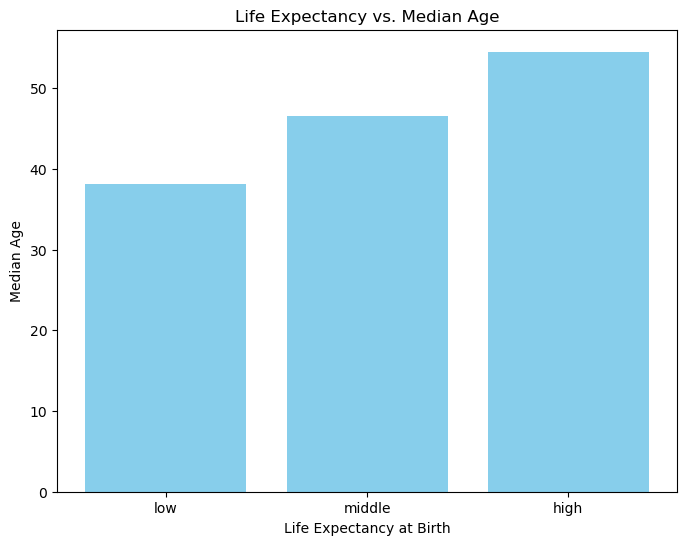

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Median Age, as of 1 July (years)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Median Age')
plt.title('Life Expectancy vs. Median Age')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Total Deaths (thousands)'] = just_countries_years['Total Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/3921891739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Deaths (thousands)'] = just_countries_years['Total Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


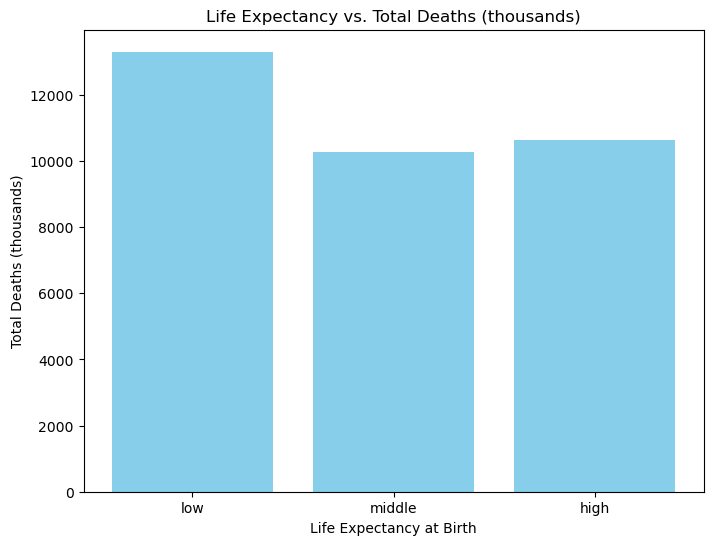

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Total Deaths (thousands)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Total Deaths (thousands)')
plt.title('Life Expectancy vs. Total Deaths (thousands)')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/3984615340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


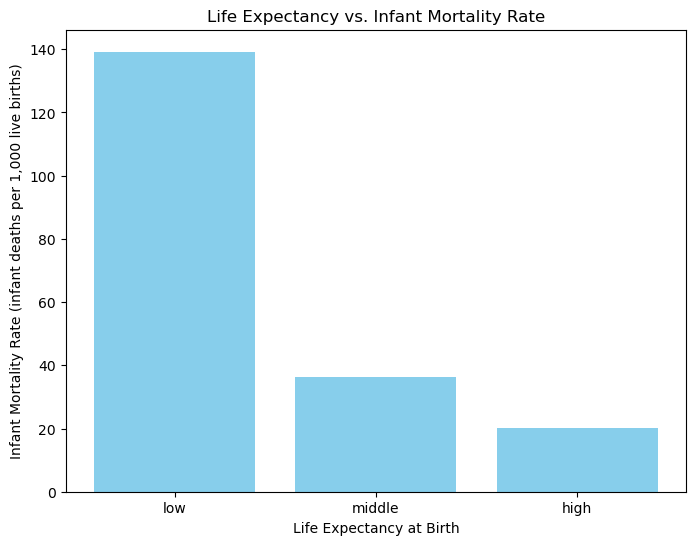

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Infant Mortality Rate (infant deaths per 1,000 live births)')
plt.title('Life Expectancy vs. Infant Mortality Rate')

# Show the plot
plt.show()

In [ ]:
data = data.drop(['Index','Variant', 'Notes','Location code', 'ISO2 Alpha-code','SDMX code**','Parent code','Total Population, as of 1 January (thousands)','Population Annual Doubling Time (years)'], axis=1) 
#eventuually drop country names and just use their alpha 3 code 
# # sort by type - only keep country/area!!!
# only years after 2000               

In [ ]:
just_countries_years['']

### MODEL BUILDING

Dropping more columns that can't/shouldn't be used in the ML process


In [425]:
just_countries_years = just_countries_years.drop(['ISO3 Alpha-code','Type','Year'], axis=1)
just_countries_years

KeyError: "['ISO3 Alpha-code', 'Type', 'Year'] not found in axis"

In [426]:
just_countries_years

,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,6308.0,243.1,97.0,168.0,26.6,2.03,42.5,6.87,2.42,31.1,47.5,-6.3
1783,6466.0,249.2,97.0,178.0,27.6,2.91,42.9,6.85,2.44,31.0,48.4,1.5
1784,6649.0,256.2,97.1,195.0,29.3,2.68,43.8,6.82,2.48,31.0,49.9,-2.5
1785,6861.0,264.4,97.1,209.0,30.5,3.58,44.5,6.79,2.50,30.9,50.9,5.4
1786,7120.0,274.4,97.2,227.0,31.9,3.85,45.3,6.75,2.52,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
20591,12.0,85.3,93.6,0.0,6.0,-1.11,12.7,2.03,0.96,30.0,77.5,-16.7
20592,12.0,84.4,93.3,0.0,5.6,-0.92,12.4,2.01,0.96,30.0,77.9,-14.4
20593,12.0,83.7,93.1,0.0,6.1,-0.80,12.2,1.99,0.95,30.0,79.6,-14.5
20594,12.0,83.2,93.0,0.0,5.2,-0.22,12.0,1.98,0.94,30.0,78.8,-7.1


In [427]:
#looking at range - just curious - crazy how large it is!!
range = (just_countries_years['Life Expectancy at Birth, both sexes (years)'].max()) - (just_countries_years['Life Expectancy at Birth, both sexes (years)'].min()) 
range

44.5

Splitting data into test, tune, and train (80-10-10)


In [428]:
X = just_countries_years.drop('Life Expectancy at Birth, both sexes (years)', axis=1)
y = just_countries_years['Life Expectancy at Birth, both sexes (years)']

In [429]:
y

1782     47.5
1783     48.4
1784     49.9
1785     50.9
1786     52.0
         ... 
20591    77.5
20592    77.9
20593    79.6
20594    78.8
20595    78.4
Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64

In [430]:
#checking to make sure life expectancy dropped
X

,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Net Migration Rate (per 1,000 population)"
1782,6308.0,243.1,97.0,168.0,26.6,2.03,42.5,6.87,2.42,31.1,-6.3
1783,6466.0,249.2,97.0,178.0,27.6,2.91,42.9,6.85,2.44,31.0,1.5
1784,6649.0,256.2,97.1,195.0,29.3,2.68,43.8,6.82,2.48,31.0,-2.5
1785,6861.0,264.4,97.1,209.0,30.5,3.58,44.5,6.79,2.50,30.9,5.4
1786,7120.0,274.4,97.2,227.0,31.9,3.85,45.3,6.75,2.52,30.9,6.6
...,...,...,...,...,...,...,...,...,...,...,...
20591,12.0,85.3,93.6,0.0,6.0,-1.11,12.7,2.03,0.96,30.0,-16.7
20592,12.0,84.4,93.3,0.0,5.6,-0.92,12.4,2.01,0.96,30.0,-14.4
20593,12.0,83.7,93.1,0.0,6.1,-0.80,12.2,1.99,0.95,30.0,-14.5
20594,12.0,83.2,93.0,0.0,5.2,-0.22,12.0,1.98,0.94,30.0,-7.1


In [431]:
y.info()  

<class 'pandas.core.series.Series'>
Index: 5192 entries, 1782 to 20595
Series name: Life Expectancy at Birth, both sexes (years)
Non-Null Count  Dtype  
--------------  -----  
5192 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=22)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,random_state=48)

Create the kfold object for cross validation

Step 1: Cross validation process

In [433]:
kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)

Step 2: Hyperparameter search --> create the scoring metric we will use to evaluate model + the depth hyperparameter

In [434]:
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

Step 3: Train the model --> build the regression tree object

In [435]:
#this is the regressor model we will use!
reg=DecisionTreeRegressor(random_state=30)

#setting up search for the best decisiontreeregressor estimator based on r-squared across all different folds
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

#executing the search
model = search.fit(X_train, y_train)

Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method.

In [388]:
best= model.best_estimator_
print(best) 
#the best depth is 10

DecisionTreeRegressor(max_depth=18, random_state=30)


View the results

In [436]:
#scores based on depth

#Scores: 

#Have negative mean squared error so need to take absolute value and square root to convert to root mean squared error
mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))

#nothing needs to be done for r2, it is the same
r2= model.cv_results_['mean_test_r2']

#Have negative mean absolute error so need to take absolute value
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

#Get standard deviations as well...
SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model)

    depth      rmse        r2       mae    rmseSD      r2SD     maeSD
0       1  5.784786  0.551434  4.559454  2.160807  0.035016  0.133326
1       2  4.890351  0.679681  3.812199  2.003542  0.027261  0.129288
2       3  4.077077  0.776804  3.145630  1.359577  0.024581  0.113468
3       4  3.726283  0.813582  2.810334  1.160943  0.020525  0.104150
4       5  3.358217  0.848648  2.513238  0.957628  0.016352  0.091930
5       6  3.023233  0.877336  2.243826  0.920534  0.014925  0.107128
6       7  2.720032  0.900710  1.994315  0.746781  0.012065  0.094622
7       8  2.435192  0.920422  1.737675  0.584581  0.009395  0.073559
8       9  2.222738  0.933729  1.536194  0.627482  0.009229  0.083841
9      10  2.059244  0.943068  1.379650  0.532454  0.008255  0.079073
10     11  1.986287  0.947051  1.275314  0.530577  0.007916  0.069823
11     12  1.929763  0.950040  1.198894  0.589052  0.008458  0.076833
12     13  1.907220  0.951221  1.146066  0.531088  0.007503  0.076481
13     14  1.871059 

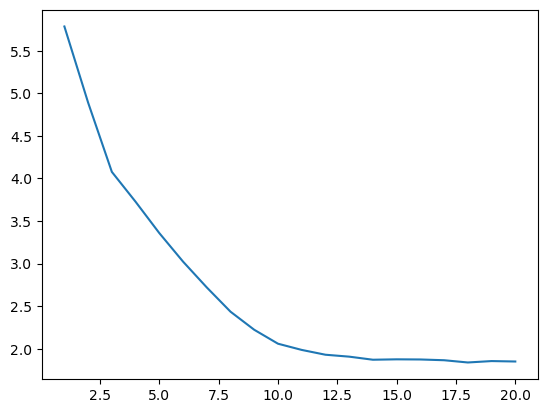

In [437]:
print(plt.plot(final_model.depth, final_model.rmse))

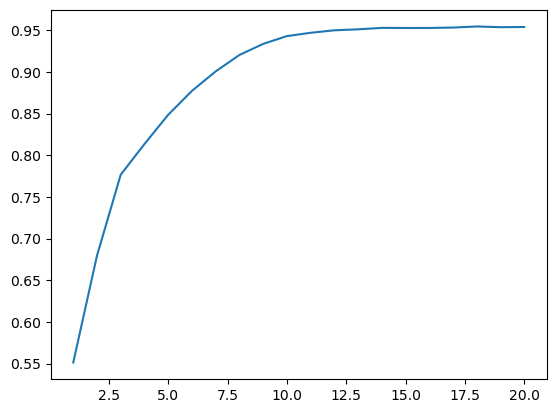

In [391]:
print(plt.plot(final_model.depth, final_model.r2))

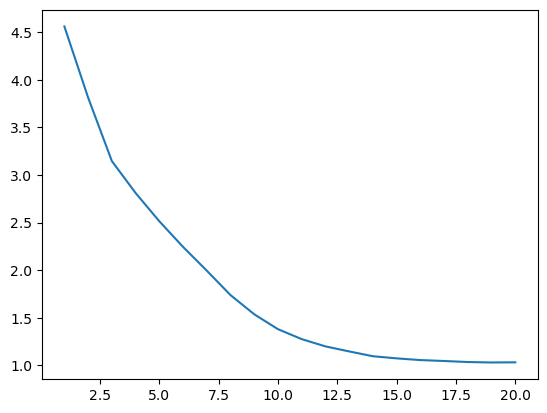

In [392]:
print(plt.plot(final_model.depth, final_model.mae))

Feature importance!
1. Median Age, as of 1 July (years)
2. Crude Birth Rate (births per 1,000 population)
3. Mean Age Childbearing (years) 

In [438]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                                                    importance
Crude Birth Rate (births per 1,000 population)        0.752823
Rate of Natural Change (per 1,000 population)         0.088632
Mean Age Childbearing (years)                         0.059278
Total Pop                                             0.026665
Population Density                                    0.025938
Population Sex Ratio, as of 1 July (males per 1...    0.019844
Population Growth Rate (percentage)                   0.010115
Natural Change, Births minus Deaths (thousands)       0.005358
Net Reproduction Rate (surviving daughters per ...    0.004792
Total Fertility Rate (live births per woman)          0.003847
Net Migration Rate (per 1,000 population)             0.002707


Axes(0.125,0.11;0.775x0.77)


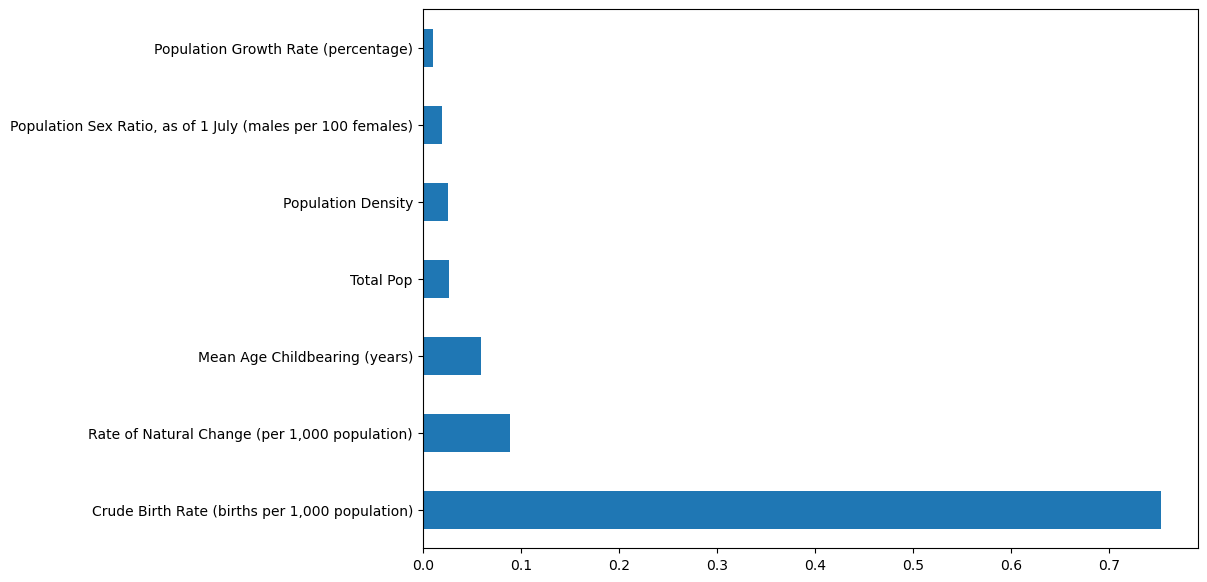

In [394]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [439]:
pred=best.predict(X_test)
print(pred[:10])

[59.1        74.23076923 64.9        48.4        69.2        68.5
 80.875      70.5        73.2        83.7       ]


In [440]:
#This number is Rsquared which we want to be close to 1. 
print(metrics.r2_score(y_test, pred))

0.9703383334140115


In [441]:
#We want this number, RSME, to be less than .5  -
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) 

#MAE we want to be below .5 as well 
print(metrics.mean_absolute_error(y_test, pred)) #nice!

1.4990359537442541
0.8734470107040957


In [442]:
#remaining data

pred=best.predict(X_tune)
print(pred[:10])

#just using test data
print(best.score(X_tune, y_tune))

[71.8        72.8        76.8        50.         74.8        75.2
 80.17368421 72.8        47.4        79.9       ]
0.9701983169711428


In [443]:
# Get the probabilities of the predictions
reg.fit(X_test, y_test)
predictions = reg.predict(X)

In [444]:
y_test

19721    60.2
16125    74.4
17983    65.5
5890     48.8
7923     68.5
         ... 
3728     54.1
7560     72.6
2514     55.6
14249    82.6
15678    74.6
Name: Life Expectancy at Birth, both sexes (years), Length: 520, dtype: float64

In [445]:
#country code
top_predictions = [data2['ISO3 Alpha-code'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-

In [446]:
#life expectancy
top_predictions = [data2['Life Expectancy at Birth, both sexes (years)'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782   

Ranking out of the 5,192 life expectancy data points 

The lowest five for life expectancy (all Burundi)

- 47.5 (#59)
- 48.4 (#78)
- 49.9 (#101)
- 50.9 (#142)
- 52.0 (#191)

The lowest five for life expectancy (all Wallis and Futuna)

- 77.5 (#3902)
- 77.9 (#4016)
- 79.6 (#4384)
- 78.8 (#4195)
- 78.4 (#4118)

Because the top and bottom 5 were all the same country, here must be something, some other predictor, that is making our model think they are the lowest and highest. We should look more into each of them. 
Wallis and Futana is actually a territory and has a low population, so one of its metric is probably weird and that is affecting it. 




In [447]:
sorted = data2.sort_values(by = 'Life Expectancy at Birth, both sexes (years)', ascending =True)
sorted


,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
3151,ZWE,Country/Area,2001.0,11911.0,30.8,90.3,203.0,16.9,0.55,36.0,3.95,1.45,28.4,42.0,-11.4
4667,SWZ,Country/Area,2005.0,1072.0,61.7,92.8,14.0,12.7,0.53,31.6,3.68,1.34,28.4,42.1,-7.4
4666,SWZ,Country/Area,2004.0,1066.0,61.4,92.8,14.0,13.3,0.61,31.6,3.73,1.37,28.4,42.5,-7.2
4740,LSO,Country/Area,2006.0,1977.0,65.1,95.7,16.0,8.2,0.26,29.1,3.43,1.29,28.5,42.9,-5.6
4741,LSO,Country/Area,2007.0,1983.0,65.3,95.8,18.0,9.0,0.42,29.7,3.44,1.30,28.4,43.1,-4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,MCO,Country/Area,2017.0,37.0,24862.1,96.2,-0.0,-12.5,-0.12,9.0,2.15,1.04,31.0,85.7,11.3
14115,MCO,Country/Area,2021.0,37.0,24621.5,96.1,-0.0,-12.5,-0.68,8.8,2.11,1.02,31.0,85.9,5.6
14112,MCO,Country/Area,2018.0,37.0,24851.7,96.1,-0.0,-10.9,0.03,9.2,2.21,1.07,31.0,86.5,11.3
14113,MCO,Country/Area,2019.0,37.0,24855.0,96.1,-0.0,-11.2,-0.01,9.0,2.16,1.05,31.0,86.5,11.3
